In [78]:
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import io, color, img_as_ubyte
import os


In [59]:
image = io.imread('image1.jpg')
gray_image = color.rgb2gray(image)


In [60]:
gray_image.shape

(694, 1008)

In [61]:
U,S,Vh = np.linalg.svd(gray_image, full_matrices=False)
U.shape

(694, 694)

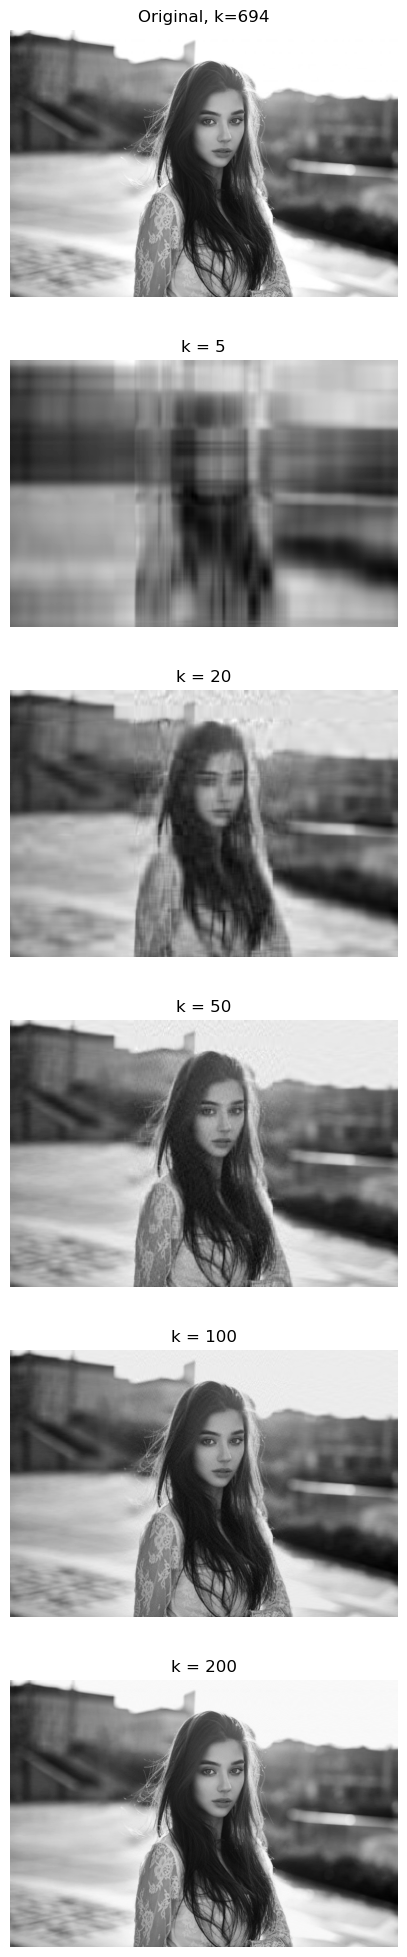

In [72]:
k_values = [5, 20,50,100,200]

fig, axes = plt.subplots(len(k_values)+1,1, figsize=(5,25))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title(f'Original, k={gray_image.shape[0]}')
axes[0].axis('off')

for i, k in enumerate(k_values):
    img_recon = np.dot(U[:,:k]*S[:k], Vh[:k,:])
    axes[i+1].imshow(img_recon, cmap='gray')
    axes[i+1].set_title('k = {}'.format(k))
    axes[i+1].axis('off')

plt.show()

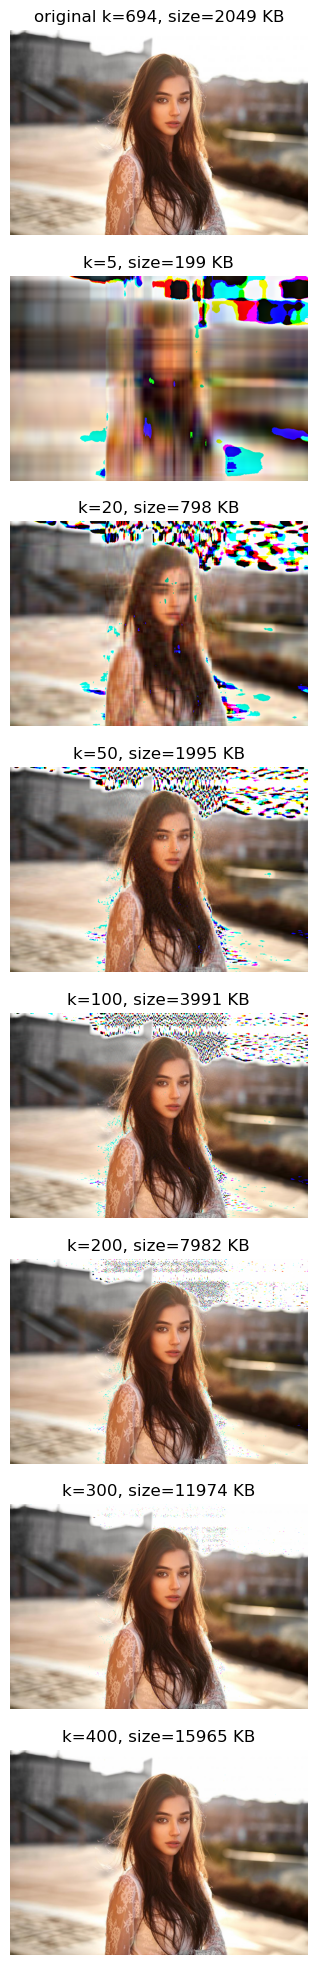

In [79]:
R, G, B = image[:,:,0],image[:,:,1],image[:,:,2]

def calc_compressed_size(U, S, Vt, k):
    return U[:,:k].nbytes + S[:k].nbytes + Vt[:k,:].nbytes

def svd_compress(channel, k):
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    compressed_channel = np.dot(U[:,:k]*S[:k], Vt[:k,:])
    compressed_size = calc_compressed_size(U,S,Vt,k)
    return compressed_channel, compressed_size

k_values = [5, 20, 50, 100, 200, 300, 400]
fig, axes = plt.subplots(len(k_values)+1,1, figsize=(5,25))

original_size = image.nbytes
axes[0].imshow(image)
axes[0].set_title(f'original k={image.shape[0]}, size={original_size //1024} KB')
axes[0].axis('off')

for i, k in enumerate(k_values):
    R_compressed, R_size = svd_compress(R, k)
    G_compressed, G_size = svd_compress(G, k)
    B_compressed, B_size= svd_compress(B, k)
    compressed_image = np.stack((R_compressed, G_compressed, B_compressed), axis=2).astype(np.uint8)
    compressed_image_size = R_size + G_size + B_size

    axes[i+1].imshow(compressed_image)
    axes[i+1].set_title(f'k={k}, size={compressed_image_size//1024} KB')
    axes[i+1].axis('off')

plt.show()


In [80]:
from PIL import Image

In [81]:
def jpeg_compress(input_image_path, output_image_path, quality):
    image = Image.open(input_image_path)
    image_rgb = image.convert('RGB')
    image_rgb.save(output_image_path, 'JPEG', quality=quality)

    original_size = os.path.getsize(input_image_path)
    compressed_size = os.path.getsize(output_image_path)

    print(f'Original size: {original_size//1024} KB')
    print(f'Compressed size: {compressed_size//1024} KB')


In [85]:
input_image_path = 'image1.jpg'
output_image_path = 'compressed_image1.jpg'
quality = 400

jpeg_compress(input_image_path,
              output_image_path,
              quality=quality)

Original size: 96 KB
Compressed size: 218 KB


Original size: 96 KB
Compressed size: 18 KB
Original size: 96 KB
Compressed size: 25 KB
Original size: 96 KB
Compressed size: 31 KB
Original size: 96 KB
Compressed size: 35 KB
Original size: 96 KB
Compressed size: 39 KB
Original size: 96 KB
Compressed size: 46 KB


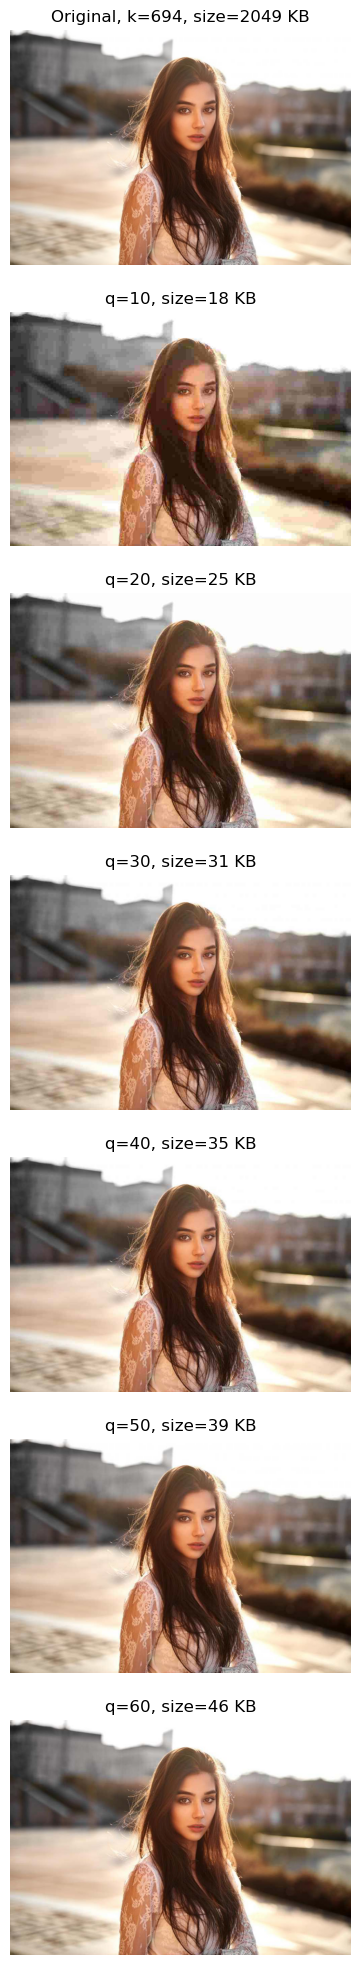

In [86]:
q_values = [10, 20, 30, 40, 50, 60]
input_image_path = 'image1.jpg'


fig, axes = plt.subplots(len(q_values)+1, 1, figsize=(5,25))

axes[0].imshow(image)
axes[0].set_title(f'Original, k={image.shape[0]}, size={original_size//1024} KB')
axes[0].axis('off')

for i, q in enumerate(q_values):
    jpeg_compress(input_image_path=input_image_path,
                  output_image_path=f"image1_{q}.jpg",
                  quality=q)
    compressed_image = Image.open(f"image1_{q}.jpg")
    compressed_image_size = os.path.getsize(f"image1_{q}.jpg")
    
    axes[i+1].imshow(compressed_image)
    axes[i+1].set_title(f'q={q}, size={compressed_image_size//1024} KB')
    axes[i+1].axis('off')

plt.show()

